In [1]:
#######################################################################################################
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import sys

# Get the current notebook's directory
notebook_dir = os.path.abspath('')
# Add the relative path to your Codes directory
codes_path = os.path.join(notebook_dir, "..", "Codes")
codes_path = os.path.abspath(codes_path)  # Normalize the path
# Add to path if not already there
if codes_path not in sys.path:
    sys.path.insert(1, codes_path)
from myUtils import *

MAINPATH is set to: /home/emanuele/Research/APES/FHN/


In [2]:
codes_path

'/home/emanuele/Research/APES/Forest_Human_Nexus/Codes'

In [3]:
print(MAINPATH)

/home/emanuele/Research/APES/FHN/


In [4]:
PATHL = os.path.join(MAINPATH, 'Data/OUTPUT/FAC/FAC_{window}_{year}.tif')
PATHL

'/home/emanuele/Research/APES/FHN/Data/OUTPUT/FAC/FAC_{window}_{year}.tif'

# 1. Import shapefile

In [5]:
# Load shapefile and reproject
# Import world boundaries
fName = os.path.join(MAINPATH, 'Data/SHAPEFILES/world-administrative-boundaries.shp')
gdf = gpd.read_file(fName)
gdf = gdf.to_crs("ESRI:54009")

# Figure 1A

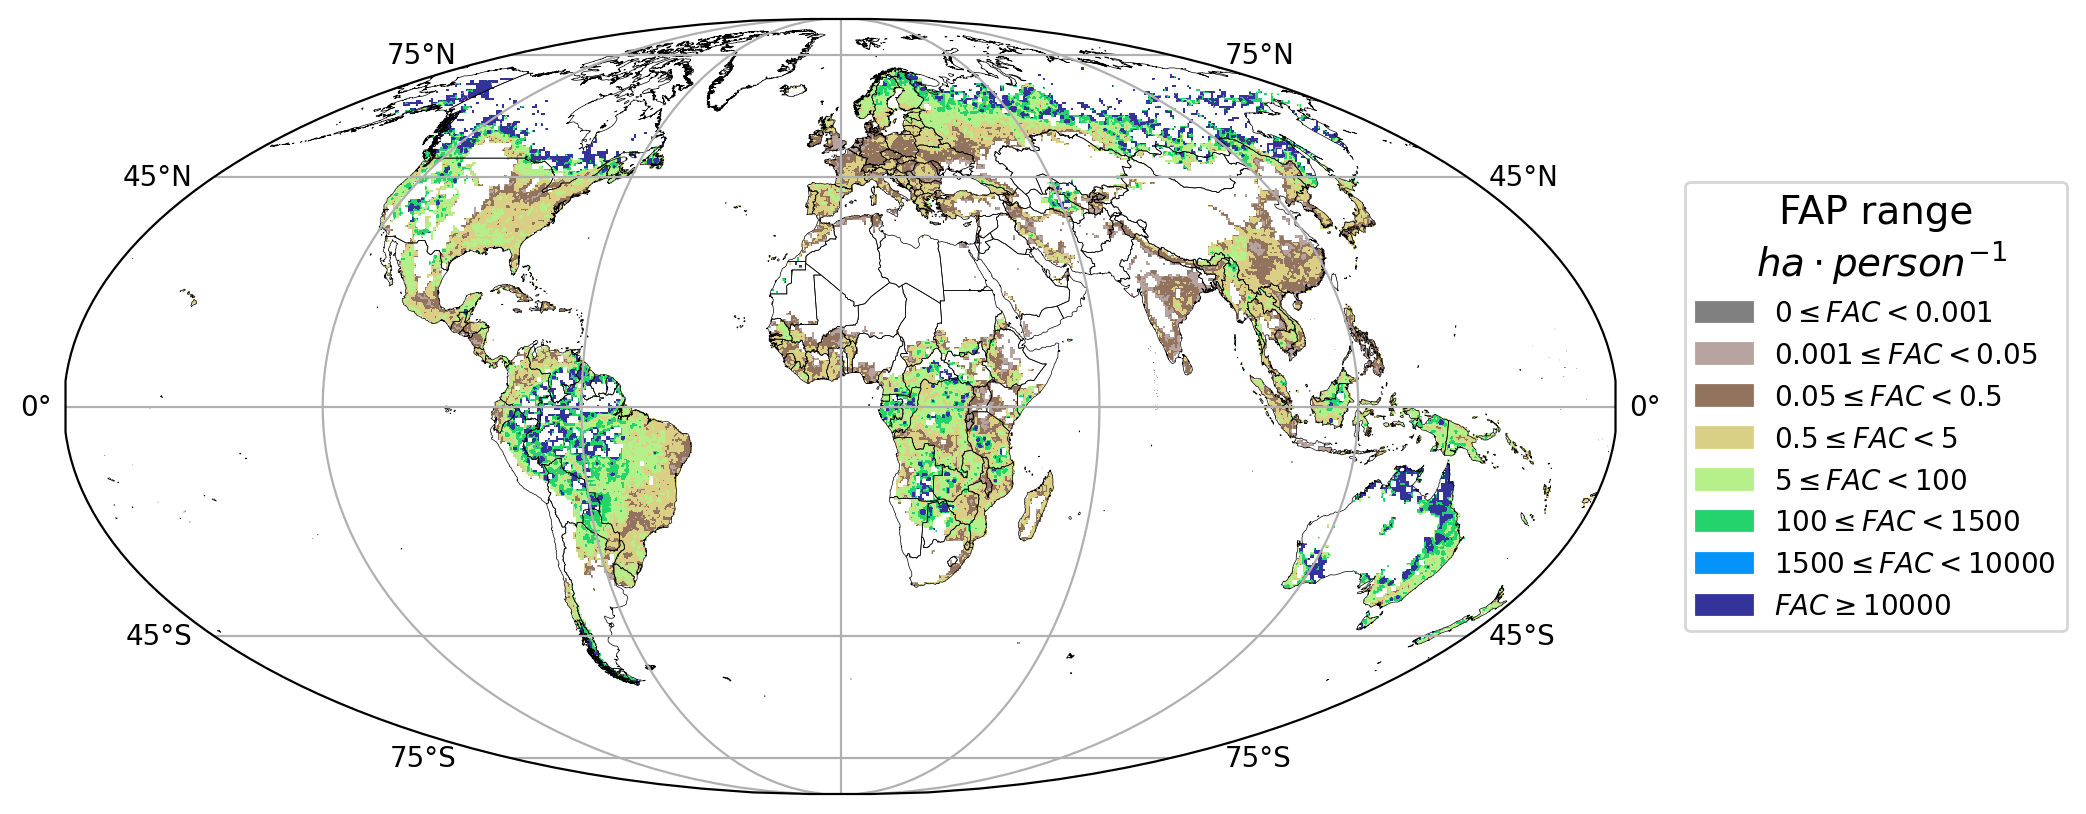

In [7]:
# Figure 1A
window = 50
year = 2020
file_raster_path = PATHL.format(window=window, year=year)

data, src = read_raster(file_raster_path)
data1 = data * 100  # Convert from km² to Ha

# Define colormap for plotting
values = [0, 0.001, 0.05, 0.5, 5, 100, 1500, 10000]
cmap = plt.get_cmap('terrain_r')
n_colors = len(values)
colors = [cmap(i / (n_colors - 1)) for i in range(n_colors)]
colors[0] = 'gray'
cmap, ncolors = ListedColormap(colors), len(colors)
norm = BoundaryNorm(values, ncolors=ncolors, clip=True)


# Plot Figure 1A
fig = plt.figure(figsize=(10, 20))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
gdf.boundary.plot(ax=ax, color='black', lw=.25)
plot_data_maps(ax, data1, cmap, norm, src)

legend_patches = [Patch(color=colors[i], label=rf'${values[i]} \leq FAC < {values[i+1]}$') for i in range(n_colors - 1)]
legend_patches.append(Patch(color=colors[-1], label=rf'$FAC \geq {values[-1]}$'))
add_legend(ax, legend_patches, 'FAP range\n ' + r'$ha \cdot person^{-1}$')

### 1.1 Save Figure 1A

In [8]:
# Save Figure 1A
fout = '../Figures/Figure1A.pdf'
fig.savefig(fout, dpi=300, bbox_inches='tight')

# Figure 1B

In [ ]:
# Compute relative difference for Figure 1B
year = 1975
file_raster_path = PATHL.format(window=window, year=year)
data, src = read_raster(file_raster_path)
data0 = data * 100  # Convert from km² to Ha
dataRelDiff = 100 * (data1 - data0) / data0

# Plot Figure 1B
vmin, vmax = -100, 100
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
ax.set_extent([-18000000, 18000000, -9000000, 9000000], crs=crsplot)
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.LAND, facecolor='white')
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl.ylocator = mticker.FixedLocator([-75, -45, 0, 45, 75])
gl.top_labels = False
gl.bottom_labels = False
gdf.boundary.plot(ax=ax, color='black', lw=.25)
show(dataRelDiff, cmap='seismic_r', vmin=vmin, vmax=vmax, ax=ax, transform=src.transform)

# Add colorbar to Figure 1B
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='seismic_r', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, extend='both', shrink=0.4, aspect=30)
cbar.set_label('FAP [%]', fontsize=13, labelpad=10)
cbar.ax.tick_params(labelsize=12)

### 2.1 Save Figure 1B

In [ ]:
fout = '../Figures/Figure1B.pdf'
fig.savefig(fout, dpi=300, bbox_inches = 'tight')

# 3 Plot Trend

In [ ]:
# Define trend
dataTrend = (data1 - data0) / (2020-1975)
# Define range of values
values = [-50, -5, -.05, -0.005, 0, 0.005, 0.05, 5, 50]  

# Create a colormap from matplotlib's predefined colormaps
cmap = plt.get_cmap('seismic_r')  # You can change 'Blues' to any other colormap name

# Generate discrete colors from the colormap
n_colors = len(values)+1
colors = [cmap(i / (n_colors - 1)) for i in range(n_colors)]

# Create colormap and normalization
cmap, ncolors = ListedColormap(colors), len(colors)
norm = BoundaryNorm(values, ncolors=ncolors, clip=True)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
# Plot data
gdf.boundary.plot(ax=ax, color='black', lw=.25)
plot_data_maps(ax, dataTrend, cmap, norm, src)

# Add legend
legend_patches = [
    Patch(color=colors[0],  label=rf'${values[0]} < FAC < {values[1]}$'),
    Patch(color=colors[1], label=rf'${values[1]} \leq FAC < {values[2]}$'),
    Patch(color=colors[2], label=rf'${values[2]} \leq FAC < {values[3]}$'),
    Patch(color=colors[3], label=rf'${values[3]} \leq FAC < {values[4]}$'),
    Patch(color=colors[4],label=rf'${values[4]} \leq FAC < {values[5]}$'),
    Patch(color=colors[5], label=rf'${values[5]} \leq FAC < {values[6]}$'),
    Patch(color=colors[6], label=rf'${values[6]} \leq FAC < {values[7]}$'),
    Patch(color=colors[7],  label=rf'${values[7]} \leq FAC < {values[8]}$')
]
title = 'FAP trend\n ' + r'$ha \cdot person^{-1} \cdot year^{-1}$'
legend = ax.legend(handles=legend_patches, 
                   loc='center right', 
                   bbox_to_anchor=(1.35, 0.5), 
                   title=title, title_fontsize=14)
legend.get_title().set_ha('center')

In [ ]:
fout =  '../Figures/FAC_trend.pdf'
fig.savefig(fout, dpi=300, bbox_inches = 'tight')